In [1]:
import pandas as pd
import pandas as pd 
import nltk
from nltk import *
import matplotlib.pyplot as plt

import string

from flashtext import KeywordProcessor

In [2]:
file = pd.read_csv('FeedbackLanguage_wTags_Interns.csv')


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45585 entries, 0 to 45584
Data columns (total 12 columns):
id             45584 non-null object
sender_id      45513 non-null float64
parent_id      32905 non-null float64
CR_response    45585 non-null int64
page           709 non-null object
subject        12449 non-null object
message        45503 non-null object
TagCount       45585 non-null int64
Tag1           10392 non-null object
Tag2           1221 non-null object
Tag3           99 non-null object
Tag4           8 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.2+ MB


In [4]:
file.head(100)

,id,sender_id,parent_id,CR_response,page,subject,message,TagCount,Tag1,Tag2,Tag3,Tag4
0,28220,7678.0,NaN,0,NaN,Download signed contract,I have a signed rental agreement for my rental...,2,User Connection,Lease Agreement,NaN,NaN
1,28221,50032.0,NaN,0,NaN,publish a listing to all the Major Rental Sites?,Does TenantCloud help publish a listing to all...,1,Listing Portal,NaN,NaN,NaN
2,28222,2141.0,NaN,0,NaN,New tenant can’t see Rent invoice,I have a new tenant (Simon) in my Carroll Cayn...,1,Dwolla,NaN,NaN,NaN
3,28223,57074.0,NaN,0,NaN,Dwolla,I just setup Dwolla today. Can not go through ...,1,Dwolla,NaN,NaN,NaN
4,28224,11429.0,NaN,0,NaN,Change/Add GL line items,Is there a way to change and/or add GL line it...,1,Categories,NaN,NaN,NaN
5,28225,34718.0,NaN,0,NaN,Reporting rent payments to credit bureaus,We have a tenant that asked if we could report...,1,Credit Bureau,NaN,NaN,NaN
6,28226,12422.0,NaN,0,NaN,205 (1/1/18) TYPE IN / MODIFY THE DATE,NaN,0,NaN,NaN,NaN,NaN
7,28227,23446.0,28226.0,0,NaN,NaN,Thanks for reaching out. In reviewing;this the...,0,NaN,NaN,NaN,NaN
8,28228,23446.0,28213.0,0,NaN,NaN,"Thanks for reaching out.; Yes, you can change,...",0,NaN,NaN,NaN,NaN
9,28229,46603.0,28164.0,0,NaN,NaN,"HI Alina,I rather put my Dwolla account in ret...",0,NaN,NaN,NaN,NaN


# Data Cleanup

In [5]:
tag1 = file['Tag1'].dropna().tolist()
tag2 = file['Tag2'].dropna().tolist()
tag3 = file['Tag3'].dropna().tolist()
tag4 = file['Tag4'].dropna().tolist()
all_tags = tag1+tag2+tag3+tag4

all_tags

tags = []
for i in all_tags: 
    if i not in tags: 
        tags.append(i)

        
tags = [x.lower() for x in tags]
print(tags)

['user connection', 'listing portal', 'dwolla', 'categories', 'credit bureau', 'tenant screening', 'accounting', 'maintenance request', 'section 8', 'rental application', 'online payments', 'paid subscription', 'import / export', 'email notifications', 'credits', 'lease agreement', 'property / unit', 'lease', 'property board', 'vendors', 'multiple admins', 'credit check', 'renters insurance', 'late fees', 'zillow', 'application fee', 'notices', 'servicepro', 'management fees', 'reports', 'maintenance', 'calendar', 'combined lease', 'rent increase', 'renew lease', 'slow response', 'move in', 'tc messenger', 'e-sign', 'timeline', 'templates', 'landlord verification', 'move in / move out inspections', 'remove account', 'wording fixes', 'balances', 'file manager', 'logo', 'expense report', 'apply online', 'ssn', 'equipment', 'annual subscription', 'landlord website', 'cancelled subscription', 'maintenance report', 'micro-deposits', 'property investment tool', 'monthly property report', 're

In [6]:
''# Only the messages with no parent id and not null
messages = file['message'].where(file['parent_id'].isnull()).dropna()
print(len(messages))

12600


In [7]:

def remove_html_tags(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

In [8]:
feedback_list = messages.tolist()

In [9]:
feedback_string =''.join(feedback_list)
feedback_string = remove_html_tags(feedback_string)

In [10]:
feedback_tokens = nltk.word_tokenize(feedback_string)

# Initial Data Exploration

In [11]:
fdist = FreqDist(feedback_tokens)
print(fdist)

<FreqDist with 24955 samples and 612610 outcomes>


In [12]:
# show the 10 most common words
fdist.most_common(10)

[('to', 22925),
 ('the', 22585),
 ('.', 20648),
 ('I', 19293),
 (';', 14957),
 (',', 13972),
 ('a', 11957),
 ('and', 10292),
 ('?', 8416),
 ('is', 7600)]

In [13]:
# normalize the features to lower case and exclude punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
word_list = [".", ";", ":", "?", "''", "to", "the", "a", "I", ",", "and", "is", "it", "for", "my"]





stopwords = stopwords.words( 'english' )
features = [ feature for feature in feedback_tokens if feature.isalpha() ]
features = [ feature.lower() for feature in feedback_tokens ]
features = [feature for feature in feedback_tokens if feature not in stopwords]
features = [feature for feature in feedback_tokens if feature not in word_list]



#filtered_sent = [i for i in sentences if '?' in i]

# stemmer     = PorterStemmer()
# stems       = [ stemmer.stem( feature ) for feature in feedback_tokens ]
# frequencies = FreqDist( stems )

# print(frequencies)
# frequencies.most_common(10)

In [14]:
fdist2 = FreqDist(features)
print(fdist2)
fdist2.most_common(10)

<FreqDist with 24940 samples and 436529 outcomes>


[('have', 6249),
 ('that', 5806),
 ('in', 5531),
 ('of', 5224),
 ('not', 5158),
 ('on', 4609),
 ('do', 4243),
 ('tenant', 4207),
 ('you', 3909),
 ('this', 3835)]

In [15]:
ngrams      = ngrams( features, 2 )
frequencies = FreqDist( ngrams )
frequencies.most_common( 40 )

[(('set', 'up'), 1081),
 (('bank', 'account'), 1066),
 (('How', 'do'), 749),
 (('Is', 'there'), 720),
 (('do', "n't"), 705),
 (('can', 'not'), 658),
 (('there', 'way'), 643),
 (('would', 'like'), 632),
 (('Can', 'you'), 551),
 (('ca', "n't"), 549),
 (('pay', 'rent'), 490),
 (('would', 'be'), 475),
 (('tenant', 'cloud'), 472),
 (('Thank', 'you'), 467),
 (('does', 'not'), 455),
 (('be', 'able'), 443),
 (('do', 'not'), 440),
 (('you', 'please'), 423),
 (('!', '!'), 422),
 (('am', 'trying'), 414),
 (('how', 'do'), 407),
 (('let', 'me'), 395),
 (('How', 'can'), 384),
 (('’', 't'), 377),
 (('has', 'been'), 372),
 (('TC', 'Payments'), 364),
 (('Tenant', 'Cloud'), 355),
 (('does', "n't"), 352),
 (('you', 'have'), 337),
 (('they', 'are'), 321),
 (('by', 'Dwolla'), 314),
 (('if', 'you'), 312),
 (('one', 'of'), 309),
 (('powered', 'by'), 292),
 (('have', 'been'), 287),
 (('have', 'not'), 285),
 (('are', 'not'), 285),
 (('Payments', 'powered'), 277),
 (('out', 'of'), 269),
 (('will', 'be'), 264)]

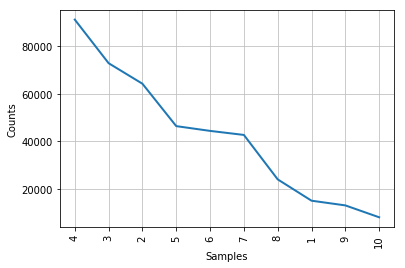

In [16]:

# create a list each token's length, and plot the top 10 result; How many "long" words are there?
lengths = [ len( feature ) for feature in features ]
plot    = FreqDist( lengths ).plot( 10 )

In [17]:
# initialize a stemmer, stem the features
# Use FreqDist to count & tabulate, and output to 10 most common
from nltk.stem import PorterStemmer
stemmer     = PorterStemmer()
stems       = [ stemmer.stem( feature ) for feature in features ]
frequencies = FreqDist( stems )
frequencies.most_common( 30 )

[('tenant', 7295),
 ('have', 6792),
 ('that', 5906),
 ('in', 5539),
 ('not', 5371),
 ('of', 5224),
 ('account', 5010),
 ('can', 4750),
 ('on', 4611),
 ('thi', 4459),
 ('do', 4455),
 ('you', 4055),
 ('payment', 3975),
 ('but', 3882),
 ('rent', 3453),
 ('be', 3351),
 ('how', 3264),
 ('leas', 3023),
 ('properti', 2968),
 ('as', 2924),
 ('an', 2847),
 ('with', 2837),
 ('there', 2813),
 ('up', 2767),
 ('me', 2753),
 ('are', 2672),
 ('need', 2503),
 ('when', 2435),
 ('or', 2416),
 ("n't", 2415)]

In [18]:
# re-create the features and create a NLTK Text object
features = word_tokenize( feedback_string )
text     = Text( features )

In [19]:

# count & tabulate, again; list a given word -- season to taste
frequencies = FreqDist( text )
print( frequencies[ 'dwolla' ] )

147


In [20]:
print( text.concordance( 'dwolla' ) )

Displaying 25 of 25 matches:
 rent please ? Thanks ! I just setup Dwolla today . Can not go through my paymen
lly deleted.I set up an account with Dwolla , it was approved and functional . H
ction is not working . I was told by Dwolla support to address this issue with y
rying to verify checking account for Dwolla ACH . Indicates that it will send ve
enants are set up to pay online with dwolla and tenant cloud.I see that many hav
ccounts to automatic transfer in the Dwolla settings ? I tried to find the messa
uisance with not being verified with dwolla is creating a burden transferring fu
Simon is having some trouble getting Dwolla payments setup in order to pay his r
 my assistant , to be able to access Dwolla and do the monthly pulls when we get
ccounts on the TC app ? Why is my TC Dwolla payment delayed ? The client paid on
and rent payment that was made to my dwolla ; account into my checking account .
ank youI sent a support request that Dwolla shows my license is still pending . 

In [21]:
# list the words (features) most associated with the given word
text.similar( 'dwolla' )

tc tenantcloud the it tenants this rent tenant paypal me and them
lease stripe that you payment account my email


In [22]:
text.similar( 'accounting' )

tenant rent tenants account property payment lease the application
properties and landlord listing it owner information system dashboard
email bank


In [23]:
print( text.concordance( '?' ) )

Displaying 25 of 25 matches:
ow , Rent.com , Apartments.com ... etc ? I have a new tenant ( Simon ) in my Ca
his ASAP so he can pay the rent please ? Thanks ! I just setup Dwolla today . C
ct when handling end of the year taxes ? We have a tenant that asked if we coul
s . Is this possible with Tenant Cloud ? ; A new tenant has completed and paid 
ces in order to complete the screening ? If so how long will this take ? A pros
eening ? If so how long will this take ? A prospected tenant has completed the 
 some additional requested information ? The October 15 , 2017 mortgage payment
should exist . ; Can you fix it for me ? I ca n't find a way to fix it.One of o
ants that are currently living on site ? Can they be notified via text or app ?
? Can they be notified via text or app ? I need to show November payment of 690
ccess so that tenants can begin paying ? I was wondering where the rental appli
questions that I have set will show up ? I do n't see where a potential renter 
rm with jus

In [24]:
sentences = tokenize.sent_tokenize(feedback_string)


In [25]:
filtered_sent = [i for i in sentences if '?' in i]
questions_small = [x.lower() for x in filtered_sent]

In [26]:
filtered_sent

['I have a signed rental agreement for my rental property and I don’t see how I can download this to be printed.Please advise or email the signed agreement.Thanks,Does TenantCloud help publish a listing to all the Major Rental Sites like Zillow, Rent.com, Apartments.com ...etc ?I have a new tenant (Simon) in my Carroll Caynon property who can’t see the rent invoice to pay it.',
 'Can someone please look into this ASAP so he can pay the rent please?',
 'Can not go through my payment with Dwolla.Is there a way to change and/or add GL line items so that the category is correct when handling end of the year taxes?We have a tenant that asked if we could report rent payments to any of the three major credit bureaus.',
 'Is this possible with Tenant Cloud?',
 'Does this mean Chekr is in progress of completing the necessary information from different sources in order to complete the screening?',
 'If so how long will this take?A prospected tenant has completed the application.',
 'Why is it no

In [27]:
for line in filtered_sent:
    words = line.split()
    if '?' in words[-1:]:
        print(words[words.index('?')-1])
        
        
        

accounts
happening
Why
created
way
anything
turnaround
them
transactions
login
tenants
tenant
2018
2017
change
videos
report
2
commission
shorter
listed
different
maintenance
arrears
batch
services/utilities
property
have
here
https://paddingtonmhp.tenantcloud.com/#about;
request
month
up
payment
correct
property
many
tenant
2018
lease
dwolla
there;
dwolla
there
account
website
10/1
account
individually
account
money
fail
complicated
me
properly
button
payments
working
ASAP
suspended
website
needed
there
on
manually
site
suppliers
balance
me
it
showing
rejected
that
now)
fee
days
charges
class
issues
away
cash
to
rent
response
it
etc
this
happening
phone


In [28]:
#y = list(set(x))


from collections import Counter

a = dict(Counter(questions_small))





print(a)          #or print(a) in python-3.x


{'i have a signed rental agreement for my rental property and i don’t see how i can download this to be printed.please advise or email the signed agreement.thanks,does tenantcloud help publish a listing to all the major rental sites like zillow, rent.com, apartments.com ...etc ?i have a new tenant (simon) in my carroll caynon property who can’t see the rent invoice to pay it.': 1, 'can someone please look into this asap so he can pay the rent please?': 1, 'can not go through my payment with dwolla.is there a way to change and/or add gl line items so that the category is correct when handling end of the year taxes?we have a tenant that asked if we could report rent payments to any of the three major credit bureaus.': 1, 'is this possible with tenant cloud?': 1, 'does this mean chekr is in progress of completing the necessary information from different sources in order to complete the screening?': 1, 'if so how long will this take?a prospected tenant has completed the application.': 1, '

In [29]:
print(len(a))

6922


In [30]:
print(len(filtered_sent))

7165


In [31]:
duplicate_questions = {k:v for (k,v) in a.items() if v >= 2}

In [32]:
duplicate_questions

{'if so, how?': 3,
 '; why is that?': 2,
 'can this be fixed?': 3,
 'can you please hire a new web designer?': 2,
 "why are the 'core' menu options even there?": 2,
 "why are the sub-menu's not attached?": 2,
 "why are some of the sub menu's obscurely placed/shaded?": 2,
 'how do i change this?': 2,
 'can you help me with this?': 2,
 '; is there a way to do this?': 4,
 'what happened?': 3,
 'how do i do that?': 5,
 'why?': 8,
 'why is this?': 5,
 '; is that possible?': 2,
 'is that normal?': 2,
 'any suggestions?': 4,
 '; what am i missing?': 2,
 'am i doing something wrong?': 2,
 'why is that?': 4,
 'can you help?': 7,
 ";can you please tell me what's going on?": 2,
 ';↵↵the bank account is verified either with the help of instant or micro-deposits verification method.↵↵check out the following link for the precise instructions:↵how to add a funding source?↵↵don&rsquo;t hesitate to submit a support ticket if you happen to have any further questions or need some clarification!': 5,
 ';↵

In [33]:
unique_questions = {k:v for (k,v) in a.items() if v == 1}

In [34]:
unique_questions

{'i have a signed rental agreement for my rental property and i don’t see how i can download this to be printed.please advise or email the signed agreement.thanks,does tenantcloud help publish a listing to all the major rental sites like zillow, rent.com, apartments.com ...etc ?i have a new tenant (simon) in my carroll caynon property who can’t see the rent invoice to pay it.': 1,
 'can someone please look into this asap so he can pay the rent please?': 1,
 'can not go through my payment with dwolla.is there a way to change and/or add gl line items so that the category is correct when handling end of the year taxes?we have a tenant that asked if we could report rent payments to any of the three major credit bureaus.': 1,
 'is this possible with tenant cloud?': 1,
 'does this mean chekr is in progress of completing the necessary information from different sources in order to complete the screening?': 1,
 'if so how long will this take?a prospected tenant has completed the application.':

In [35]:
unique_sentences = list(unique_questions.keys())

In [36]:
unique_sentences

['i have a signed rental agreement for my rental property and i don’t see how i can download this to be printed.please advise or email the signed agreement.thanks,does tenantcloud help publish a listing to all the major rental sites like zillow, rent.com, apartments.com ...etc ?i have a new tenant (simon) in my carroll caynon property who can’t see the rent invoice to pay it.',
 'can someone please look into this asap so he can pay the rent please?',
 'can not go through my payment with dwolla.is there a way to change and/or add gl line items so that the category is correct when handling end of the year taxes?we have a tenant that asked if we could report rent payments to any of the three major credit bureaus.',
 'is this possible with tenant cloud?',
 'does this mean chekr is in progress of completing the necessary information from different sources in order to complete the screening?',
 'if so how long will this take?a prospected tenant has completed the application.',
 'why is it no

In [37]:
#dwolla_questions = [i for i in unique_sentences if 'dwolla' in i]


In [38]:

dwolla_words = "dwolla, dowolla, wolla,dolla,dwlla,dwola,dwola,dwoll,ddwolla,dwwolla,dwoolla,dwollla,dwollla,dwollaa,wdolla,dowlla,dwlola,dwolal,swolla,ewolla,rwolla,fwolla,cwolla,xwolla,dqolla,d2olla,d3olla,deolla,ddolla,dsolla,daolla,dwilla,dw9lla,dw0lla,dwplla,dwllla,dwklla,dwokla,dwoola,dwopla,dwolka,dwoloa,dwolpa,dwollq,dwollw,dwolls,dwollx,dwollz,sdwolla,dswolla,edwolla,dewolla,rdwolla,drwolla,fdwolla,dfwolla,cdwolla,dcwolla,xdwolla,dxwolla,dqwolla,dwqolla,d2wolla,dw2olla,d3wolla,dw3olla,dewolla,dweolla,ddwolla,dwdolla,dswolla,dwsolla,dawolla,dwaolla,dwiolla,dwoilla,dw9olla,dwo9lla,dw0olla,dwo0lla,dwpolla,dwoplla,dwlolla,dwollla,dwkolla,dwoklla,dwoklla,dwolkla,dwoolla,dwolola,dwoplla,dwolpla,dwolkla,dwollka,dwolola,dwolloa,dwolpla,dwollpa,dwollqa,dwollaq,dwollwa,dwollaw,dwollsa,dwollas,dwollxa,dwollax,dwollza,dwollaz"
dwolla_list = dwolla_words.split(",")

print(dwolla_list)

['dwolla', ' dowolla', ' wolla', 'dolla', 'dwlla', 'dwola', 'dwola', 'dwoll', 'ddwolla', 'dwwolla', 'dwoolla', 'dwollla', 'dwollla', 'dwollaa', 'wdolla', 'dowlla', 'dwlola', 'dwolal', 'swolla', 'ewolla', 'rwolla', 'fwolla', 'cwolla', 'xwolla', 'dqolla', 'd2olla', 'd3olla', 'deolla', 'ddolla', 'dsolla', 'daolla', 'dwilla', 'dw9lla', 'dw0lla', 'dwplla', 'dwllla', 'dwklla', 'dwokla', 'dwoola', 'dwopla', 'dwolka', 'dwoloa', 'dwolpa', 'dwollq', 'dwollw', 'dwolls', 'dwollx', 'dwollz', 'sdwolla', 'dswolla', 'edwolla', 'dewolla', 'rdwolla', 'drwolla', 'fdwolla', 'dfwolla', 'cdwolla', 'dcwolla', 'xdwolla', 'dxwolla', 'dqwolla', 'dwqolla', 'd2wolla', 'dw2olla', 'd3wolla', 'dw3olla', 'dewolla', 'dweolla', 'ddwolla', 'dwdolla', 'dswolla', 'dwsolla', 'dawolla', 'dwaolla', 'dwiolla', 'dwoilla', 'dw9olla', 'dwo9lla', 'dw0olla', 'dwo0lla', 'dwpolla', 'dwoplla', 'dwlolla', 'dwollla', 'dwkolla', 'dwoklla', 'dwoklla', 'dwolkla', 'dwoolla', 'dwolola', 'dwoplla', 'dwolpla', 'dwolkla', 'dwollka', 'dwolola',

In [39]:
#dwolla_questions = [i for i in unique_sentences if '' in i]
dwolla_questions = []
for i in unique_sentences: 
    for x in dwolla_list: 
        if x in i: 
            if i not in dwolla_questions: 
                dwolla_questions.append(i)
            

In [40]:
print(len(dwolla_questions))

348


In [41]:
print(dwolla_questions)

['can not go through my payment with dwolla.is there a way to change and/or add gl line items so that the category is correct when handling end of the year taxes?we have a tenant that asked if we could report rent payments to any of the three major credit bureaus.', '(lower priority)does not give the option to add another bank account for rent payment.how do i unlink my bank accounts to automatic transfer in the dwolla settings?i tried to find the message board and was unable to find where to turn the functionality on.buchithe site is not showing me the option to add a new vendor.is there a way to calculate common area maintenance fees or cam fees based on the square footage of the property?how do i change my email in the profile window?', ';can i have 2 apps, or toggle between the two accounts on the tc app?why is my tc dwolla payment delayed?', "what's up here?i am having issues with all my n=money transfers and rent payment that was made to my dwolla;account into my checking account

In [42]:
credit_list = 'credit'
credit = []
for i in unique_sentences: 
    for x in credit_list: 
        if x in i: 
            if i not in credit: 
                credit.append(i)

In [43]:
print(len(credit))

6834


In [44]:
print(credit)

['i have a signed rental agreement for my rental property and i don’t see how i can download this to be printed.please advise or email the signed agreement.thanks,does tenantcloud help publish a listing to all the major rental sites like zillow, rent.com, apartments.com ...etc ?i have a new tenant (simon) in my carroll caynon property who can’t see the rent invoice to pay it.', 'can someone please look into this asap so he can pay the rent please?', 'can not go through my payment with dwolla.is there a way to change and/or add gl line items so that the category is correct when handling end of the year taxes?we have a tenant that asked if we could report rent payments to any of the three major credit bureaus.', 'is this possible with tenant cloud?', 'does this mean chekr is in progress of completing the necessary information from different sources in order to complete the screening?', 'if so how long will this take?a prospected tenant has completed the application.', 'why is it not allo

In [45]:
transaction_list = ['transaction', 'transactions']
transactions_q = []
for i in unique_sentences: 
    for x in transaction_list: 
        if x in i: 
            if i not in transactions_q: 
                transactions_q.append(i)
print(len(transactions_q))
print(transactions_q)

218
[';what is the difference between "remove" and "void" under transaction options?i have a commercial property.', 'which results in late fees being charged.when i go to delete a transaction i get the following message:;"delete recurring transactionwould you like to delete only this transaction, or this and all future transactions?', '; it seems their should be additional options to choose from (cancel/this transaction/all recurring transactions) or the question should be reworded/clarified.how do i backdate the rent increase to jan. 1, 2018?', 'it says, "would you like to delete only this transaction, or this and all future transactions?"', ';is there a way to do a batch "received/paid" for all old transactions?', '?how do i apply a rent payment?hi,is it possible to add a new vendor or servicepro name while creating a new expense transaction?i feel like i remember this feature used to be available.', ';hi,is it possible for users to be able to; set a default category for vendors?a sc

In [46]:
from io import StringIO
col = ['Tag1', 'message']
df = file[col]
df = df[pd.notnull(file['message'])]
df.columns = ['Tag1', 'message']
df['category_id'] = df['Tag1'].factorize()[0]
category_id_df = df[['Tag1', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Tag1']].values)
df.head(100)
df = df.dropna()

In [47]:
df

,Tag1,message,category_id
0,User Connection,I have a signed rental agreement for my rental...,0
1,Listing Portal,Does TenantCloud help publish a listing to all...,1
2,Dwolla,I have a new tenant (Simon) in my Carroll Cayn...,2
3,Dwolla,I just setup Dwolla today. Can not go through ...,2
4,Categories,Is there a way to change and/or add GL line it...,3
5,Credit Bureau,We have a tenant that asked if we could report...,4
15,Tenant Screening,A new tenant has completed and paid for screen...,5
16,Tenant Screening,A prospected tenant has completed the applicat...,5
17,Accounting,"The October 15, 2017 mortgage payment to Chase...",6
19,Accounting,One of our units is supposed to be having a re...,6


In [48]:
df.to_csv('tags_messages_gabbys.csv')

In [49]:
df.Tag1.value_counts()

Dwolla                             1702
Accounting                          725
User Connection                     496
Rental Application                  467
Lease                               346
Online Payments                     204
Listing Portal                      195
Maintenance Request                 181
move in                             166
Reports                             163
Property / Unit                     161
Tenant Screening                    157
Late Fees                           144
Landlord Verification               140
E-sign                              130
Owner Contribution/Distribution     117
Email notifications                 113
Apply Online                        110
Categories                          109
PayPal                              107
Invoice Details                     102
Recurring invoices                   99
Renew lease                          97
Credits                              95
Idea                                 93


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.message).toarray()
labels = df.category_id

features.shape



(10387, 7010)

In [51]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Tag1, category_id in category_to_id.items():
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Tag1))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

/Users/sarahgibbons/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:166: RuntimeWarning: divide by zero encountered in true_divide
  chisq /= f_exp


# 'nan':
  . Most correlated unigrams:
       . functionality
       . zone
  . Most correlated bigrams:
       . future rent
       . free version
# 'User Connection':
  . Most correlated unigrams:
       . connect
       . connection
  . Most correlated bigrams:
       . landlord sent
       . connection request
# 'Listing Portal':
  . Most correlated unigrams:
       . zillow
       . listing
  . Most correlated bigrams:
       . marketing websites
       . unlist button
# 'Dwolla':
  . Most correlated unigrams:
       . suspended
       . dwolla
  . Most correlated bigrams:
       . bank account
       . account suspended
# 'Categories':
  . Most correlated unigrams:
       . category
       . categories
  . Most correlated bigrams:
       . categories sub
       . sub categories
# 'Credit Bureau':
  . Most correlated unigrams:
       . particularly
       . bureaus
  . Most correlated bigrams:
       . tenant asked
       . credit bureaus
# 'Tenant Screening':
  . Most correlated 

# 'Annual Subscription':
  . Most correlated unigrams:
       . annually
       . annual
  . Most correlated bigrams:
       . annual plan
       . monthly annual
# 'Landlord Website':
  . Most correlated unigrams:
       . domain
       . website
  . Most correlated bigrams:
       . try update
       . website does
# 'Cancelled Subscription':
  . Most correlated unigrams:
       . subscription
       . downgrade
  . Most correlated bigrams:
       . free account
       . cancel subscription
# 'Maintenance Report':
  . Most correlated unigrams:
       . eliminate
       . portions
  . Most correlated bigrams:
       . lot time
       . reports section
# 'Micro-deposits':
  . Most correlated unigrams:
       . small
       . micro
  . Most correlated bigrams:
       . small deposits
       . micro deposit
# 'Property investment tool':
  . Most correlated unigrams:
       . coming
       . tool
  . Most correlated bigrams:
       . tenant cloud
       . hi property
# 'Monthly Property R

# 'Marketing websites':
  . Most correlated unigrams:
       . websites
       . marketing
  . Most correlated bigrams:
       . zillow trulia
       . marketing websites
# 'RentRange Report':
  . Most correlated unigrams:
       . 19
       . 99
  . Most correlated bigrams:
       . purchased property
       . rental report
# 'Credit Reporting':
  . Most correlated unigrams:
       . checkr
       . moves
  . Most correlated bigrams:
       . trying understand
       . tenant moves
# 'Tenant Match':
  . Most correlated unigrams:
       . places
       . match
  . Most correlated bigrams:
       . tenant portal
       . delete property
# 'Refund':
  . Most correlated unigrams:
       . 90
       . refund
  . Most correlated bigrams:
       . guys help
       . like refund
# 'Smartmove. Errors.':
  . Most correlated unigrams:
       . smart
       . screening
  . Most correlated bigrams:
       . pay 35
       . ordered screening
# 'Product Offer':
  . Most correlated unigrams:
       .

# 'Auto-withdrawal':
  . Most correlated unigrams:
       . withdraw
       . 18th
  . Most correlated bigrams:
       . account said
       . way receive
# 'Owner Contribution/Distribution':
  . Most correlated unigrams:
       . distribution
       . owner
  . Most correlated bigrams:
       . owner distribution
       . invoice owner
# 'Amortization/Depreciation trackers':
  . Most correlated unigrams:
       . tracking
       . depreciation
  . Most correlated bigrams:
       . mortgage payment
       . add mortgage
# 'Service Reminders':
  . Most correlated unigrams:
       . remind
       . approaching
  . Most correlated bigrams:
       . nice able
       . ve created
# 'Debit Card':
  . Most correlated unigrams:
       . cards
       . linking
  . Most correlated bigrams:
       . accept rent
       . linking bank
# 'Welcome page':
  . Most correlated unigrams:
       . wonder
       . introduced
  . Most correlated bigrams:
       . hello new
       . property help
# 'Password

# 'property market report':
  . Most correlated unigrams:
       . snapshot
       . market
  . Most correlated bigrams:
       . bank account
       . tenant cloud
# 'Listing Contact Person':
  . Most correlated unigrams:
       . company
       . contacted
  . Most correlated bigrams:
       . information need
       . properties manage
# 'Log in':
  . Most correlated unigrams:
       . login
       . appfolio
  . Most correlated bigrams:
       . tenantcloud allow
       . cloud app
# 'Bulk Payments':
  . Most correlated unigrams:
       . consuming
       . bulk
  . Most correlated bigrams:
       . time consuming
       . bulk payments
# 'Receipt':
  . Most correlated unigrams:
       . automate
       . receipt
  . Most correlated bigrams:
       . add utility
       . allow use
# 'outstanding':
  . Most correlated unigrams:
       . logins
       . evict
  . Most correlated bigrams:
       . landlord view
       . charge tenant
# 'Print Report':
  . Most correlated unigrams:
   

# 'Payer/Payee':
  . Most correlated unigrams:
       . justin
       . payees
  . Most correlated bigrams:
       . let select
       . tenants moving
# 'Delete Contact':
  . Most correlated unigrams:
       . archive
       . drew
  . Most correlated bigrams:
       . just moved
       . delete tenant
# 'HUD':
  . Most correlated unigrams:
       . forget
       . kayla
  . Most correlated bigrams:
       . need apply
       . different amounts
# 'Duplicate Tag':
  . Most correlated unigrams:
       . maintenance
       . allowed
  . Most correlated bigrams:
       . tenant cloud
       . maintenance request
# 'Profit & Loss Statement Report':
  . Most correlated unigrams:
       . profit
       . loss
  . Most correlated bigrams:
       . general income
       . profit loss
# 'Bulk Emailing':
  . Most correlated unigrams:
       . answers
       . megan
  . Most correlated bigrams:
       . automatically sent
       . thank megan
# 'Transfer deposit to owner':
  . Most correlated un

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


X_train, X_test, y_train, y_test = train_test_split(df['message'], df['category_id'])


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [53]:

clf = MultinomialNB().fit(X_train_tfidf, y_train)



In [54]:
print(clf.predict(count_vect.transform(["i am not getting their reports although they were charged for them.what are my options now?i need these reports?"])))



[2]


In [55]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

[2]


In [56]:
print(clf.predict(count_vect.transform(["Maintenance"])))

[7]


In [57]:
dwolla_questions[3]


"what's up here?i am having issues with all my n=money transfers and rent payment that was made to my dwolla;account into my checking account."

In [58]:

dwolla_text = ''.join(dwolla_questions)


In [59]:
dwolla_text

'can not go through my payment with dwolla.is there a way to change and/or add gl line items so that the category is correct when handling end of the year taxes?we have a tenant that asked if we could report rent payments to any of the three major credit bureaus.(lower priority)does not give the option to add another bank account for rent payment.how do i unlink my bank accounts to automatic transfer in the dwolla settings?i tried to find the message board and was unable to find where to turn the functionality on.buchithe site is not showing me the option to add a new vendor.is there a way to calculate common area maintenance fees or cam fees based on the square footage of the property?how do i change my email in the profile window?;can i have 2 apps, or toggle between the two accounts on the tc app?why is my tc dwolla payment delayed?what\'s up here?i am having issues with all my n=money transfers and rent payment that was made to my dwolla;account into my checking account.am i missin

input text -> split into sentences -> remove stop words -> build a similarity matrix -> generate rank based on matrix -> pick top N sentences 

In [60]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

In [ ]:
for sentence in dwolla_text:
    print(sentence)
    sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
return sentences

In [71]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

for idx1 in range(len(sentences)):
    for idx2 in range(len(sentences)):
        if idx1 == idx2: #ignore if both are same sentences
            continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)
return similarity_matrix

SyntaxError: 'return' outside function (<ipython-input-71-0fe0f9506dba>, line 10)

In [76]:
def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  df.shape

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

# let's begin
generate_summary(dwolla_text, 2)

AttributeError: 'NoneType' object has no attribute 'shape'